In [2]:
#E1
import pandas as pd
import pickle 

#Loading Dataset
df=pd.read_csv("H:\SKILL DEVOLOPMENT\CODING PROJECTS\ipl.csv")

In [3]:
#E2
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
#E3
#Data Cleaning
columns_to_rem=['mid','batsman','bowler','striker','non-striker']
df.drop(columns_to_rem, axis=1, inplace=True)
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [5]:
#E4
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [6]:
#E5
#keeping only regular teams in prediction
const_team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
           'Mumbai Indians','Kings XI Punjab',
           'Royal Challengers Bangalore', 'Delhi Daredevils',
           'Sunrisers Hyderabad']

In [7]:
#E6
df=df[(df['bat_team'].isin(const_team)) & (df['bowl_team'].isin(const_team))]

In [8]:
#E7
#Removing out the powerplay overs i.e. first 6 overs

df=df[df['overs']>=6.0]

In [9]:
#E8
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [10]:
#E9

#Converting Date into Date time

from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


In [11]:
#Hot one Encoding the categorical features i.e. bat and bowl team

en_df=pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [12]:
en_df.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,2008-04-18,M Chinnaswamy Stadium,62,1,6.1,55,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
39,2008-04-18,M Chinnaswamy Stadium,63,1,6.2,52,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
40,2008-04-18,M Chinnaswamy Stadium,64,1,6.3,47,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
41,2008-04-18,M Chinnaswamy Stadium,66,1,6.4,45,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
42,2008-04-18,M Chinnaswamy Stadium,67,1,6.5,46,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
en_df.columns

Index(['date', 'venue', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [14]:
# Re-arranging the columns to get better view only
en_df=en_df[['date','bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total' ]]

en_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,62,1,6.1,55,1,222
39,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,63,1,6.2,52,1,222
40,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,64,1,6.3,47,1,222
41,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,66,1,6.4,45,1,222
42,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,67,1,6.5,46,1,222


In [15]:
#Splitting the data into train and test data

x_train = en_df.drop(labels='total', axis=1)[en_df['date'].dt.year<=2016]
x_test = en_df.drop(labels='total', axis=1)[en_df['date'].dt.year>=2017]


In [16]:
y_train = en_df[en_df['date'].dt.year <= 2016]['total'].values
y_test = en_df[en_df['date'].dt.year >= 2017]['total'].values

In [17]:
#Removing Date Column
x_train.drop(labels='date',axis=True, inplace=True)
x_test.drop(labels='date',axis=True, inplace=True)

In [18]:
#Model Building 

#Linear Regression:

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#Creating a Pickle File

filename='ipl.pkl'
pickle.dump(reg,open(filename, 'wb'))

# Ridge Regression


In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [21]:
ridge=Ridge()
parameters = {'alpha': [1e-16, 1e-14, 1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1, 5, 10, 20, 25, 30, 25, 40, 50, 60]}
ridge_regressor=GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train, y_train)

C:\Users\AHAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.7699e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\AHAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.09321e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\AHAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.67431e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\AHAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.81041e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\AHAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.75704e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\AHAN\anaconda3\lib\site-packages\sklearn\linear_model\_ri

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-16, 1e-14, 1e-12, 1e-10, 1e-08, 1e-06,
                                   0.0001, 0.01, 1, 5, 10, 20, 25, 30, 25, 40,
                                   50, 60]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [22]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 60}
-302.6800351555477


In [23]:
prediction=ridge_regressor.predict(x_test)

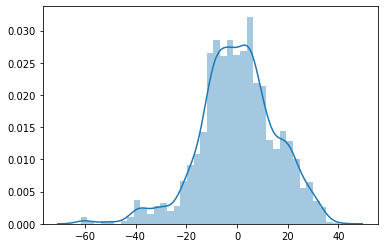

In [24]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [25]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 11.693406711890043
MSE: 230.31431787070298
RMSE: 15.176110103406042


# Lasso Regression


In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [27]:
lasso=Lasso()
parameters = {'alpha': [1e-16, 1e-14, 1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1, 5, 10, 20, 25, 30, 25, 40, 50, 60]}
lasso_regressor=GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\AHAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.7699e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\AHAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.09321e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\AHAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.67431e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\AHAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.81041e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\AHAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.75704e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\AHAN\anaconda3\lib\site-packages\sklearn\linear_model\_ri

{'alpha': 60}
-302.6800351555477


In [28]:
prediction_lasso=lasso_regressor.predict(x_test)

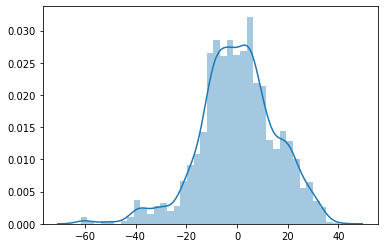

In [29]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

MAE: 11.693406711890043
MSE: 230.31431787070298
RMSE: 15.176110103406042


In [31]:
#Creating a Pickle File

filename='ipl_lasso.pkl'
pickle.dump(reg,open(filename, 'wb'))

In [34]:
#loading pickle file

model=pickle.load(open('ipl_lasso.pkl','rb'))
print(model.predict([1,7,8,9,6,8,5]))